In [43]:
#!pip install wordcloud

In [49]:
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [45]:
import wordcloud
from wordcloud import WordCloud

In [26]:
import pandas as pd
import jsondata = data.dropna(subset=['Ingredients'])

In [29]:
with open('recipes.json') as f: 
    data = json.load(f)
df=pd.DataFrame(data)

In [31]:
df.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [32]:
df['Ingredients'].head(5)

0    [2 tbsp olive oil, knob butter, 1 onion, finel...
1    [175g butter, chopped, 200g dark muscovado sug...
2    [200g dark muscovado sugar, 175g butter, chopp...
3    [500g strong white flour, plus extra for dusti...
4    [280g self-raising flour, 175g golden caster s...
Name: Ingredients, dtype: object

In [34]:
#cleaning the dataset
df['Ingredients'] = df['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x)))

In [35]:
df = df.dropna(subset=['Ingredients'])

In [36]:
#find stop words, along with recipe realted stopwords
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped' ]
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [38]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [39]:
#lemmatize the text
df['Ingredients'] = df['Ingredients'].apply(remove_encoding_text)

In [41]:
text = ' '.join(words for words in df['Ingredients'])
len(text)


408959

In [50]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [51]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [52]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')

In [54]:
tdm = vectorizer.fit_transform(df['Ingredients'])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [55]:
vectorizer.vocabulary_.items()

dict_items([('olive onion', 7420), ('onion sausagemeat', 7567), ('sausagemeat skinned', 9892), ('skinned zest', 10356), ('zest fresh', 13221), ('fresh white', 4402), ('white dried', 12786), ('dried apricot', 3644), ('apricot chestnut', 150), ('chestnut canned', 1858), ('canned fresh', 1387), ('fresh dried', 4333), ('dried cranberry', 3667), ('cranberry fresh', 2888), ('fresh boneless', 4310), ('boneless skinless', 775), ('skinless chicken', 10340), ('chicken pack', 1925), ('pack shortcrust', 7823), ('butter dark', 1176), ('dark muscovado', 3229), ('muscovado luxury', 7126), ('luxury mixed', 6567), ('mixed dried', 6989), ('dried fruit', 3683), ('fruit includes', 4496), ('includes mixed', 5598), ('mixed peel', 7030), ('peel glac', 8112), ('glac grated', 4707), ('grated zest', 4961), ('zest juice', 13231), ('juice grated', 5673), ('zest cherry', 13210), ('cherry brandy', 1810), ('brandy brandy', 845), ('brandy plus', 859), ('plus macadamia', 8748), ('macadamia large', 6570), ('large egg',

In [59]:
#finally lets create the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [60]:
tfidf_weights[0:10]

[('olive onion', 5.824471514115579),
 ('onion sausagemeat', 0.2583004743669975),
 ('sausagemeat skinned', 0.2583004743669975),
 ('skinned zest', 0.2583004743669975),
 ('zest fresh', 0.5822854727031399),
 ('fresh white', 4.835339428289038),
 ('white dried', 0.6984758317551231),
 ('dried apricot', 6.028291416266405),
 ('apricot chestnut', 0.2583004743669975),
 ('chestnut canned', 0.2583004743669975)]

In [75]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white',colormap="Set1", max_words=2000).fit_words(dict(tfidf_weights))

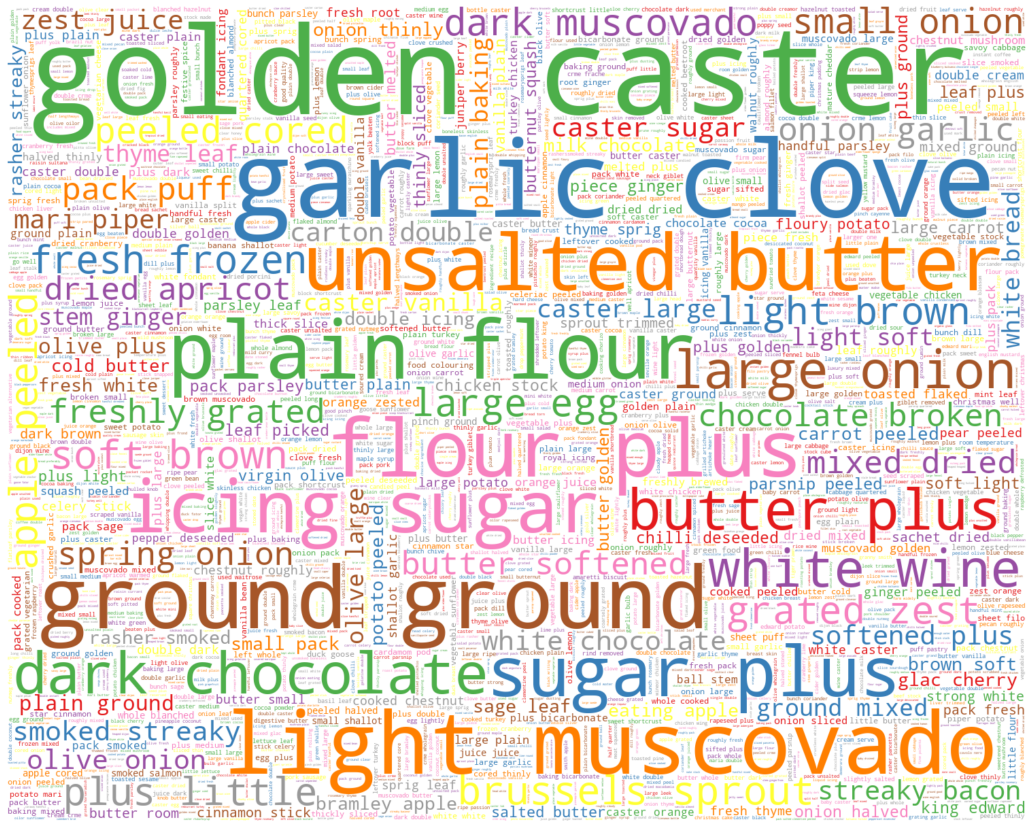

In [76]:
plt.figure(figsize=(20,15))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.savefig('recipes_wordcloud.png')